# Subreddit Analysis

Here we are going to carry out some analysis on data collected from 2 subreddits, r/india and r/politics, using the Python Reddit API Wrapper([documentation](https://praw.readthedocs.io/en/latest/)).  
  
Data taken on 1st June 2021.

In [1]:
import praw

In [2]:
from datetime import datetime

In [3]:
import pandas as pd

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

To access Reddit data through PRAW, you need certain credentials obtained using your Reddit account(namely, Client ID, Client Secret, Username, Password, and User Agent). [Read how to get these credentials here...](https://praw.readthedocs.io/en/latest/getting_started/quick_start.html)

As data like password, Client Secret etc are confidential, I have stored them in a local text file(*praw_credentials.txt*) so as to keep them hidden. When required, I will read from there and pass it into the Reddit object. You can pass the credentials directly without using any files.

In [5]:
with open("praw_credentials.txt") as f:
    credentials = f.readlines()
credentials = [x.strip() for x in credentials] 

In [6]:
reddit = praw.Reddit(client_id = credentials[0], client_secret = credentials[1], username = credentials[2], password = credentials[3], user_agent = credentials[4])

Now our Reddit instance is ready!  
  
Let's check out the India subreddit.

## r/India subreddit

In [7]:
india = reddit.subreddit('india')

I am going to create a pandas DataFrame containing the details of the top 100 posts in the subreddit from the past year.  
  
To do so, I first create an empty list, *submissions_india*. Then for each top post, I initialise a dictionary, insert the details into it, and finally append it to the list.  
  
After the loop execution, I have a **list of dictionaries**. This list can be readily converted to the required pandas DataFrame.

In [8]:
submissions_india = []

In [9]:
for submission in india.top('year',limit=100):
    d = {}
    d['id'] = submission.id
    d['title'] = submission.title
    d['num_comments'] = submission.num_comments
    d['score'] = submission.score
    d['upvote_ratio'] = submission.upvote_ratio
    d['date'] = datetime.fromtimestamp(submission.created_utc)
    d['domain'] = submission.domain
    d['gilded'] = submission.gilded
    d['num_crossposts'] = submission.num_crossposts
    d['nsfw'] = submission.over_18
    try:
        d['author'] = submission.author.name
    except:
        d['author'] = 'Not Found'
    submissions_india.append(d)

**NOTE** : Here we have made a try-except block for the author detail. It is to accomodate any case where the Reddit account is deleted.

In [10]:
india_top100 = pd.DataFrame(submissions_india)

In [11]:
india_top100

,id,title,num_comments,score,upvote_ratio,date,domain,gilded,num_crossposts,nsfw,author
0,mxe8r0,'We've only been here a few hours and have see...,1873,36333,0.93,2021-04-24 12:01:03,v.redd.it,1,28,False,EddieEhlriCh
1,n61pqx,My grandmother fought and beat COVID after bat...,393,19631,0.95,2021-05-06 12:56:16,i.redd.it,0,3,False,randomvariable10
2,h8q51x,Lamborghini blocked by buffaloes in India,461,17060,0.97,2020-06-14 14:12:45,i.redd.it,0,27,False,GoneHippocamping
3,iuwkek,"As a Brazilian, I just want to say that you gu...",570,16222,0.96,2020-09-18 06:45:32,i.redd.it,0,10,False,ludico1959
4,laysjw,Rihanna shows support for farmers.,888,15849,0.91,2021-02-02 21:23:31,i.redd.it,1,5,False,blingsingh
...,...,...,...,...,...,...,...,...,...,...,...
95,lv2s0a,Anti National,480,6227,0.91,2021-03-01 12:46:34,i.redd.it,1,2,False,bhodrolok
96,mrrfrt,I captured a 50 megapixel image of the Moon fr...,222,6222,0.98,2021-04-16 05:34:40,i.redd.it,1,1,False,prathameshjaju1
97,lc8kb2,Deccan Herald slams Tendulkar,418,6183,0.91,2021-02-04 10:59:09,i.redd.it,0,6,False,clayagds99
98,gvw1x2,For an industry that has to paint their actors...,495,6162,0.94,2020-06-03 21:00:14,i.redd.it,1,5,False,isabellapintop


## Analysing the source of posts

The *domain* value indicates the source(url) of the post.

In [12]:
pd.DataFrame(india_top100['domain'].value_counts()).head(n=10)

,domain
i.redd.it,70
reddit.com,8
v.redd.it,7
self.india,4
i.imgur.com,4
imgur.com,2
businessinsider.in,1
indiatoday.in,1
i.ibb.co,1
mumbaimirror.indiatimes.com,1


We can see that the vast majority of posts don't link to any external sites.

## Analysing authors of top posts

In [13]:
india_top100.author.value_counts()

pooniahigh          4
EddieEhlriCh        3
dlisfyn             2
bhodrolok           2
sir_qoala           2
                   ..
blingsingh          1
HillsHaveEyesToo    1
MidhileshSai        1
SpliffKillah        1
texasbluemoon       1
Name: author, Length: 88, dtype: int64

We can see that we have 88 unique authors for the top 100 posts. Let's check for the authors who have multiple top posts.

In [14]:
df = pd.DataFrame(india_top100.author.value_counts().loc[lambda x:x>1])

In [15]:
df

,author
pooniahigh,4
EddieEhlriCh,3
dlisfyn,2
bhodrolok,2
sir_qoala,2
Anubhav_xx,2
AatmanirbharBerojgar,2
prathameshjaju1,2
raghu972,2


Overall, only 9 accounts have multiple entries in the top 100 posts.

In [16]:
df['author'].sum()

21

These 9 authors account for 21 posts between them. The remaining 79 posts are made by 79 different accounts.

In [17]:
df.describe()

,author
count,9.000000
mean,2.333333
std,0.707107
min,2.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,4.000000


Now let's check for any deleted account.

In [18]:
india_top100.loc[india_top100.author == 'Not Found']

,id,title,num_comments,score,upvote_ratio,date,domain,gilded,num_crossposts,nsfw,author
49,hytbx0,An empirical analysis of ten rupees chips pack...,486,7613,0.97,2020-07-27 20:02:11,i.redd.it,0,2,False,Not Found


Out of the top 100, one post is made by a deleted account.

## Graphs

Now let's plot two graphs, *score vs num_comments* and *score vs num_crossposts*, and see whether there is any sort of relation between the attributes.

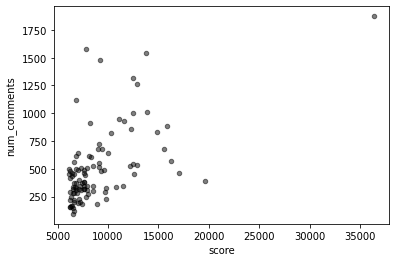

In [19]:
ax1 = india_top100.plot.scatter(x='score',y='num_comments',c='k',alpha=.5)

Between *score* and *num_comments*, we can see a bit of a linear relationship, which is logically understandable(post with more upvotes might get more comments). But there are quite a few outliers. So the relationship isn't exactly clear.

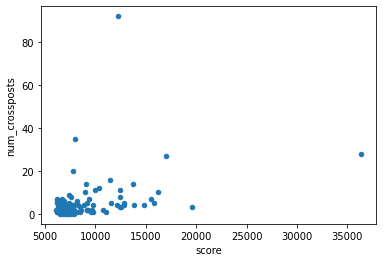

In [20]:
ax2 = india_top100.plot.scatter(x='score',y='num_crossposts')

*score* vs *num_crossposts* is even more random. There doesn't seem to be any decipherable relation between them.

## r/politics subreddit

The first few steps are the same as above.

In [21]:
politics = reddit.subreddit('politics')

In [22]:
submissions_politics = []

In [23]:
for submission in politics.top('year',limit=100):
    d = {}
    d['id'] = submission.id
    d['title'] = submission.title
    d['num_comments'] = submission.num_comments
    d['score'] = submission.score
    d['upvote_ratio'] = submission.upvote_ratio
    d['date'] = datetime.fromtimestamp(submission.created_utc)
    d['domain'] = submission.domain
    d['gilded'] = submission.gilded
    d['num_crossposts'] = submission.num_crossposts
    d['nsfw'] = submission.over_18
    try:
        d['author'] = submission.author.name
    except:
        d['author'] = 'Not Found'
    submissions_politics.append(d)

In [24]:
politics_top100 = pd.DataFrame(submissions_politics)

In [25]:
politics_top100

,id,title,num_comments,score,upvote_ratio,date,domain,gilded,num_crossposts,nsfw,author
0,jptq5n,Megathread: Joe Biden Projected to Defeat Pres...,83190,214319,0.88,2020-11-07 21:58:04,self.politics,319,28,False,PoliticsModeratorBot
1,krntg6,Mitch McConnell Will Lose Control Of The Senat...,10297,156595,0.91,2021-01-06 18:55:44,buzzfeednews.com,42,20,False,klawdz
2,i9161a,AOC challenges Trump to release his college tr...,7957,153240,0.93,2020-08-13 20:15:08,independent.co.uk,5,20,False,ohnoh18
3,l1k8xa,"Biden signs federal mask mandate, repeals Musl...",6100,136690,0.84,2021-01-21 03:58:55,independent.co.uk,4,9,False,ohnoh18
4,jcm5dz,Trump Threatens to ‘Leave the Country’ if He L...,16368,135308,0.89,2020-10-17 06:38:58,thedailybeast.com,15,32,False,ONE-OF-THREE
...,...,...,...,...,...,...,...,...,...,...,...
95,krzt11,Remove Trump Tonight,3586,94213,0.84,2021-01-07 04:45:37,theatlantic.com,15,6,False,treetyoselfcarol
96,im2uc1,Trump: Americans Who Died in War Are ‘Losers’ ...,7941,94076,0.85,2020-09-04 03:08:26,theatlantic.com,20,45,False,HabitRage
97,kkqkxx,"She Noticed $200 Million Missing, Then She Was...",1526,94030,0.94,2020-12-27 03:12:48,propublica.org,2,18,False,Helicase21
98,gy4g9w,George W. Bush won't support Donald Trump’s re...,4229,93983,0.88,2020-06-07 08:12:45,texastribune.org,0,20,False,salvorhardin_BE


## Analysing the source of posts

In [26]:
pd.DataFrame(politics_top100['domain'].value_counts()).head(n=10)

,domain
independent.co.uk,23
newsweek.com,12
self.politics,7
commondreams.org,7
businessinsider.com,5
thehill.com,4
washingtonpost.com,4
buzzfeednews.com,3
theatlantic.com,3
thedailybeast.com,2


Here we can see that the majority of posts are links to external news websites. Which is understandable for a subreddit which is primarily focussed on political news.

## Analysing authors of top posts

In [27]:
df1 = pd.DataFrame(politics_top100.author.value_counts().loc[lambda x:x>1])

In [28]:
df1

,author
PoliticsModeratorBot,7
ohnoh18,4
grepnork,3
slaysia,3
Twoweekswithpay,2
DaFunkJunkie,2
theladynora,2
Plymouth03,2
hildebrand_rarity,2
theindependentonline,2


In [29]:
df1['author'].sum()

31

In [30]:
df1.describe()

,author
count,11.000000
mean,2.818182
std,1.537412
min,2.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,7.000000


Here, we have 11 accounts with multiple posts in the top 10. These accounts have 31 posts between them.

In [31]:
politics_top100.loc[politics_top100.author == 'Not Found']

,id,title,num_comments,score,upvote_ratio,date,domain,gilded,num_crossposts,nsfw,author


Here, we do not have any deleted account as the author for a top 100 post.

## Graphs

Just like before, we will plot graphs between some selected attributes to see whether any relationship can be deciphered.

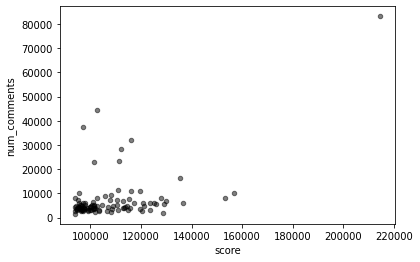

In [32]:
ax1 = politics_top100.plot.scatter(x='score',y='num_comments',c='k',alpha=.5)

*score* vs *num_comments* shows even less linear relationship, as compared to the corresponding values in the India subreddit.

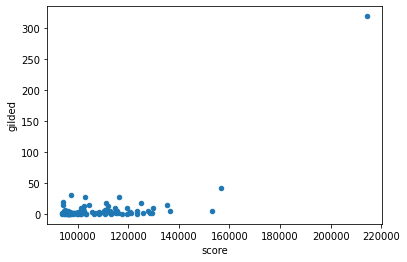

In [33]:
ax2 = politics_top100.plot.scatter(x='score',y='gilded')

Here we try a graph between *score* and *gilded*(no. of awards the post has received). Again, no clear relationship.

## Finding out commonly used words

We have the titles of the top 100 posts in the politics subreddit over the last year. From that, we can find out the words which repeat the most in the titles. From that, we can acertain the most newsworthy topics in the subreddit.

To carry out language processing, we import the **spacy** library. It is a library used for Natural Language Processing. [Find out more about spacy here...](https://spacy.io/usage)

In [34]:
import spacy

In [35]:
nlp = spacy.load("en_core_web_sm")

In [36]:
t = politics_top100['title'].to_list()

In [37]:
titles = nlp(str(t))

In [38]:
titles

['Megathread: Joe Biden Projected to Defeat President Donald Trump and Win the 2020 US Presidential Election', 'Mitch McConnell Will Lose Control Of The Senate As Democrats Have Swept The Georgia Runoffs', "AOC challenges Trump to release his college transcript after he called her a 'poor student' on Fox News | 'You release your college transcript, I’ll release mine, and we’ll see who was the better student. Loser has to fund the Post Office,' New York congresswoman tweets", 'Biden signs federal mask mandate, repeals Muslim Ban, and rejoins Paris Climate Agreement', 'Trump Threatens to ‘Leave the Country’ if He Loses to Biden', 'Demands for Kushner to Resign Over \'Staggering\' Level of \'Depravity\' That Put Politics Before Public Health. "Holy hell. Jared Kushner reportedly abandoned a national testing plan because it was *politically advantageous* to sit back and let blue states be eviscerated by the virus."', 'Over A million people sign petition calling for KKK to be declared a ter

We have converted the list of titles into a spacy object. Now using spacy, we will find out the most common Proper Nouns which appear in the post titles. That will give us an idea about the most popular topics.

In [39]:
words = [token.text for token in titles if not token.is_stop and not token.is_punct and token.pos_ == "PROPN"]

In [40]:
from collections import Counter

In [41]:
word_freq = Counter(words)

In [42]:
common_words = word_freq.most_common(10)

In [43]:
common_words

[('Trump', 30),
 ('Biden', 21),
 ('Georgia', 9),
 ('President', 8),
 ('Donald', 8),
 ('Democrats', 7),
 ('House', 6),
 ('Capitol', 6),
 ('Joe', 5),
 ('Senate', 5)]

In [44]:
a,b = zip(*common_words)

In [45]:
import numpy as np

In [46]:
a = np.array(a)
b = np.array(b)

In [47]:
sb.set(rc={'figure.figsize':(11.7,8.27)})

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 10 commonly used words')

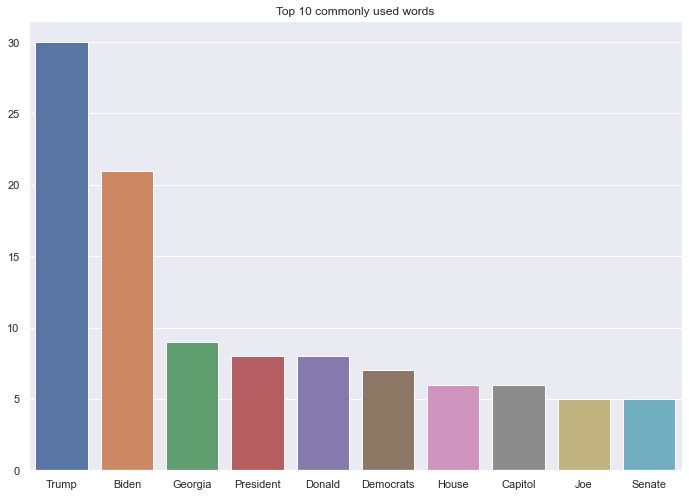

In [48]:
sb.barplot(a,b).set_title('Top 10 commonly used words')

We can see that the most common topic is Trump, with second being Biden. The top 10 words are all related to American politics. It shows how much discussed the 2020 American Elections were, and also points to the American-centric nature of the subreddit.

## Comparing both subreddits

Finally, we will use the describe() on the top 100 dataframes of each subreddit, and compare the descriptive statistics thus obtained.

In [49]:
india_top100.describe()

,num_comments,score,upvote_ratio,gilded,num_crossposts
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,506.770000,9002.510000,0.947500,0.390000,5.790000
std,336.897246,3945.313808,0.029996,1.144993,10.430428
min,94.000000,6148.000000,0.860000,0.000000,0.000000
25%,305.000000,6725.250000,0.930000,0.000000,2.000000
50%,427.000000,7603.500000,0.950000,0.000000,3.500000
75%,579.750000,9678.750000,0.970000,0.000000,6.000000
max,1873.000000,36333.000000,0.990000,8.000000,92.000000


In [50]:
politics_top100.describe()

,num_comments,score,upvote_ratio,gilded,num_crossposts
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,7454.450000,107926.820000,0.873200,7.670000,15.220000
std,10362.281869,16665.785787,0.037789,32.264705,8.475252
min,1526.000000,93962.000000,0.770000,0.000000,1.000000
25%,3580.000000,97040.000000,0.850000,0.750000,9.000000
50%,4633.000000,101916.000000,0.875000,2.000000,13.500000
75%,6640.750000,113755.500000,0.900000,5.000000,20.250000
max,83190.000000,214319.000000,0.940000,319.000000,45.000000


**OBSERVATIONS**  
  
1. In absolute numbers, r/politics is easily ahead. The mean number of comments, and mean score is more than 10 times that of a post in r/india.  
2. However, the top posts in r/India have a better mean upvote ratio than that is r/politics. It might be because a political subreddit will have a more polarized userbase, and thus more downvotes.  